In [10]:
#!/usr/bin/python
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from fpdf import FPDF


In [11]:
START_DATE = '2005-01-01'
END_DATE = str(datetime.now().strftime('%Y-%m-%d'))

## Define functions - using Yahoo Finance API to pull financial data

In [12]:
def clean_data(stock_data,col):
    weekdays = pd.date_range(start=START_DATE, end = END_DATE)
    clean_data = stock_data[col].reindex(weekdays)
    return clean_data.fillna(method='ffill')

def get_stats(stock_data):
    return {
        'last':np.mean(stock_data.tail(1)),
        'short_mean': np.mean(stock_data.tail(20)),
        'long_mean' : np.mean(stock_data.tail(200)),
        'short_rolling': stock_data.rolling(window=20).mean(),
        'long_rolling': stock_data.rolling(window=200).mean()
    }

def create_plot(stock_data, ticker):
    stats = get_stats(stock_data)
    plt.style.use('dark_background')
    plt.subplots(figsize=(12,8))
    plt.plot(stock_data,label = ticker)
    plt.plot(stats['short_rolling'], label = '20 day rolling mean')
    plt.plot(stats['long_rolling'], label = '200 day rolling mean')
    plt.xlabel('Date')
    plt.ylabel('Adj Close (p)')
    plt.legend()
    plt.title('Stock Price over Time')
    plt.show()

def get_data(ticker):
    try: 
        stock_data = data.DataReader(ticker,'yahoo',START_DATE,END_DATE)
        print(stock_data)
        
        adj_close = clean_data(stock_data,'Adj Close')
        create_plot(adj_close, ticker)
        
    except RemoteDataError:
        print('No data found for {t}'.format(t=ticker))
        
def get_close(ticker):
    stock_data = data.DataReader(ticker,'yahoo',START_DATE,END_DATE)
    adj_close = clean_data(stock_data,'Adj Close')
    return adj_close[END_DATE]

def get_std_dev(ticker):
    stock_data = data.DataReader(ticker,'yahoo',START_DATE,END_DATE)
    adj_close = clean_data(stock_data,'Adj Close')
    return np.std(adj_close)


### Show data and plot for $TSLA  (Tesla Inc.) 

                  High         Low        Open       Close      Volume  \
Date                                                                     
2010-06-29    5.000000    3.508000    3.800000    4.778000  93831500.0   
2010-06-30    6.084000    4.660000    5.158000    4.766000  85935500.0   
2010-07-01    5.184000    4.054000    5.000000    4.392000  41094000.0   
2010-07-02    4.620000    3.742000    4.600000    3.840000  25699000.0   
2010-07-06    4.000000    3.166000    4.000000    3.222000  34334500.0   
...                ...         ...         ...         ...         ...   
2021-07-12  687.239990  662.159973  662.200012  685.700012  25927000.0   
2021-07-13  693.280029  666.299988  686.320007  668.539978  20847500.0   
2021-07-14  678.609985  652.840027  670.750000  653.380005  21641200.0   
2021-07-15  666.140015  637.880005  658.390015  650.599976  20178900.0   
2021-07-16  656.699890  642.200012  654.679993  644.219971  15906402.0   

             Adj Close  
Date        

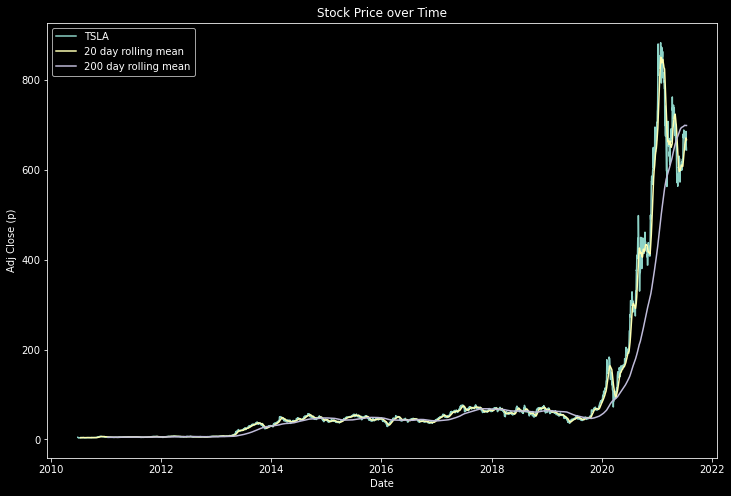

In [13]:
get_data('TSLA')

## Calculate a sample portfolio current value and standard deviation

In [14]:
Portfolio = {
    'VITPX': 2000,
    'GM' : 100,
    'NEE' : 100,
    'VIGAX' : 2000,
    'VWAGY' : 100,
    'JTYBX' : 100
}

Portfolio = pd.DataFrame.from_dict(Portfolio,orient = 'index',columns = ['Quantity'])
Portfolio['Symbol'] = Portfolio.index
Portfolio['ID'] = [1,2,3,4,5,6]
Portfolio.set_index(Portfolio['ID'], inplace=True)
Portfolio = Portfolio[['Quantity','Symbol']]
Portfolio
Portfolio['CLOSE'] = Portfolio['Symbol'].apply(get_close)
Portfolio['CURRENT_VALUE'] = Portfolio['CLOSE'] * Portfolio['Quantity']
Portfolio['PCT_ACCOUNT'] = Portfolio['CURRENT_VALUE'] / np.sum(Portfolio['CURRENT_VALUE'])
Portfolio['STD_DEV'] = Portfolio['Symbol'].apply(get_std_dev)

In [15]:
print('Current Value is: {}'.format(np.sum(Portfolio['CURRENT_VALUE'])))
print('Standard Deviation is: {}'.format(np.average(Portfolio['STD_DEV'],weights=Portfolio['PCT_ACCOUNT'])))

Current Value is: 490548.8960266113
Standard Deviation is: 24.778478042495703
